In [214]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Dropout
import plotly.express as px

In [215]:
train_dir="C:/Users/omark/Desktop/selected2/Train"
test_dir="C:/Users/omark/Desktop/selected2/TestA"

In [216]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
     preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.1
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
     preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    
)

In [217]:
train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(120, 160),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
    classes=['Basophil','Eosinophil','Lymphocyte','Monocyte','Neutrophil']
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(120, 160),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='validation',
    classes=['Basophil','Eosinophil','Lymphocyte','Monocyte','Neutrophil']
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(120, 160),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    classes=['Basophil','Eosinophil','Lymphocyte','Monocyte','Neutrophil']
)

Found 9159 images belonging to 5 classes.
Found 1016 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.


In [218]:
imgs,label=next(train_images)

In [219]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


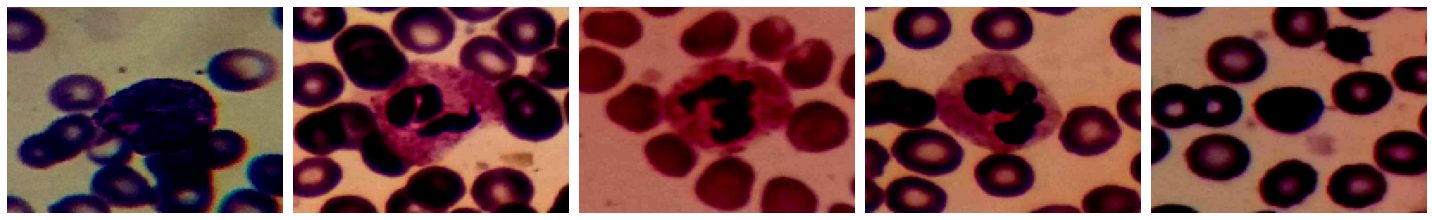

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [220]:
plotImages(imgs)
print(label[:5])

In [221]:
model = models.Sequential()
model.add(layers.Conv2D(16, 5, activation='relu', strides=(2, 2), input_shape=(120, 160, 3) ,padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Conv2D(8, 5,strides=(2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Conv2D(4, 5,strides=(2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Conv2D(4, 5, strides=(2, 2), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(16 ,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))



In [222]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 60, 80, 16)        1216      
                                                                 
 batch_normalization_68 (Bat  (None, 60, 80, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_119 (Dropout)       (None, 60, 80, 16)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 30, 40, 8)         3208      
                                                                 
 batch_normalization_69 (Bat  (None, 30, 40, 8)        32        
 chNormalization)                                                
                                                                 
 dropout_120 (Dropout)       (None, 30, 40, 8)       

In [225]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [226]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)
  
history = model.fit(train_images,
    validation_data=val_images,
    epochs=100, 
                    callbacks =[earlystopping])

Epoch 1/100
287/287 [==============================] - 48s 161ms/step - loss: 0.9807 - accuracy: 0.6250 - val_loss: 1.0489 - val_accuracy: 0.5876
Epoch 2/100
287/287 [==============================] - 47s 165ms/step - loss: 0.5875 - accuracy: 0.7667 - val_loss: 0.7928 - val_accuracy: 0.7293
Epoch 3/100
287/287 [==============================] - 48s 166ms/step - loss: 0.4869 - accuracy: 0.8071 - val_loss: 0.5835 - val_accuracy: 0.8169
Epoch 4/100
287/287 [==============================] - 48s 165ms/step - loss: 0.4434 - accuracy: 0.8370 - val_loss: 0.6088 - val_accuracy: 0.8258
Epoch 5/100
287/287 [==============================] - 47s 165ms/step - loss: 0.4120 - accuracy: 0.8529 - val_loss: 0.7246 - val_accuracy: 0.8425
Epoch 6/100
287/287 [==============================] - 47s 163ms/step - loss: 0.3794 - accuracy: 0.8623 - val_loss: 1.2384 - val_accuracy: 0.8248
Epoch 7/100
287/287 [==============================] - 47s 163ms/step - loss: 0.3644 - accuracy: 0.8631 - val_loss: 0.5811 -

In [227]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']

Test Accuracy: 93.293%


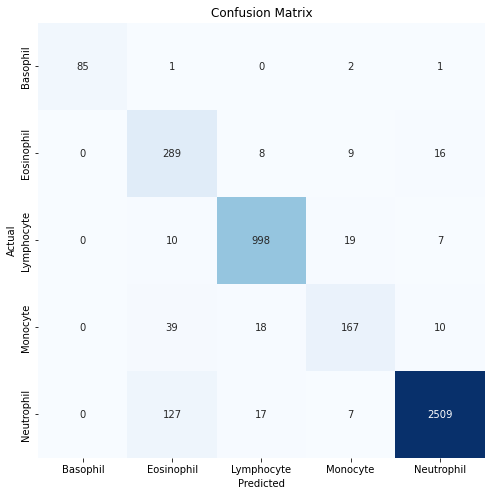

Classification Report:
----------------------
               precision    recall  f1-score   support

    Basophil       1.00      0.96      0.98        89
  Eosinophil       0.62      0.90      0.73       322
  Lymphocyte       0.96      0.97      0.96      1034
    Monocyte       0.82      0.71      0.76       234
  Neutrophil       0.99      0.94      0.96      2660

    accuracy                           0.93      4339
   macro avg       0.88      0.89      0.88      4339
weighted avg       0.94      0.93      0.94      4339



In [228]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [229]:
def plot_acc_and_loss_of_train_and_val(history):
    #plt.figure(figsize=(15,15))
    #plt.suptitle("acc,loss of train VS acc,loss of val")
    epochs=[i for i in range(40)]
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(20,10)
    ax[0].plot(epochs,train_acc,'go-',label='training accuracy')
    ax[0].plot(epochs,val_acc,'ro-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epochs,train_loss,'g-o',label='training loss')
    ax[1].plot(epochs,val_loss,'r-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

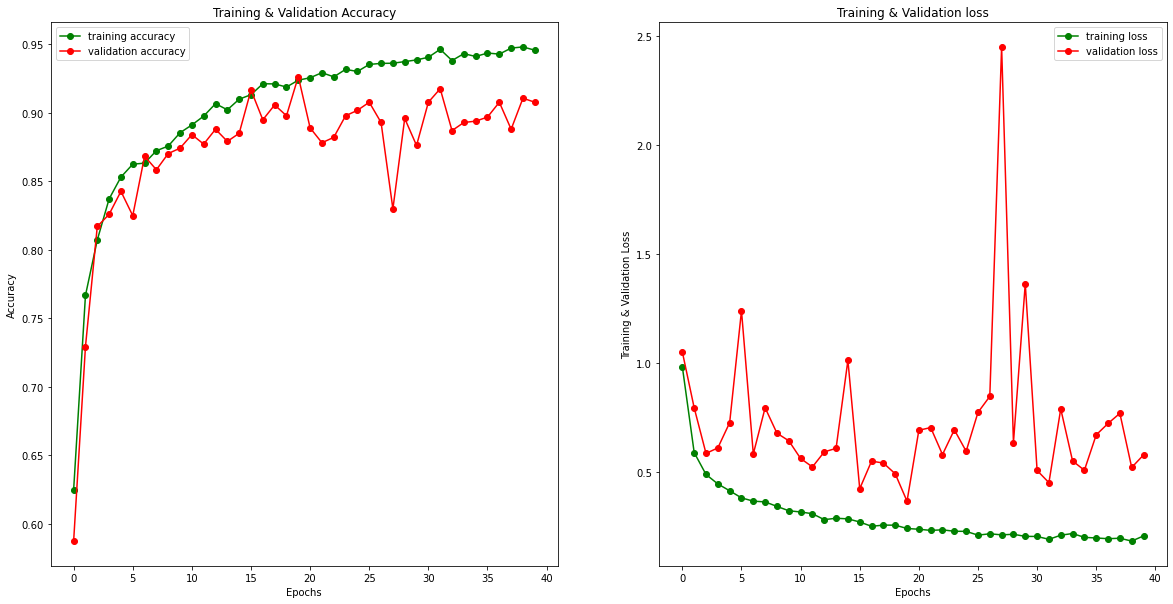

In [230]:
plot_acc_and_loss_of_train_and_val(history)

In [248]:
train_acc=history.history['accuracy']
print( "Training acc=",train_acc[19])

Training acc= 0.9235724210739136


In [247]:
train_loss=history.history['loss']
print (train_loss[19])

0.2388785034418106


In [244]:
val_acc=history.history['val_accuracy']


In [246]:
print(val_acc[19])

0.9261810779571533


In [249]:
val_loss=history.history['val_loss']

In [251]:
print(val_loss[19])

0.3641050159931183


In [254]:
model.save('C:/Users/omark/Desktop/selected2')


INFO:tensorflow:Assets written to: C:/Users/omark/Desktop/selected2\assets
